## This script contains:

##### 1. Install and import all necessary libraries in your Jupyter notebook.
##### 2. Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming).
##### 3. Use the elbow technique as shown in the Jupyter notebook for this Exercise.
##### 4. Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.
##### 5. Run the k-means algorithm.
##### 6. Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.
##### 7. Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.
##### 8. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.
##### 9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.
##### 10. Propose what these results could be useful for in future steps of an analytics pipeline.

### 1. Install and import all necessary libraries in your Jupyter notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where I import the k-means algorithm from scikit-learn
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib

In [2]:
# This option ensures the graphs I create are displayed in my notebook without the need to "call" them specifically
%matplotlib inline

In [3]:
# Importing data sets using the path as string
path = r'C:\Users\loren\Desktop\Career Foundry\2. Data Immersion Course\A6 Advanced Analytics & Dashboard Design\08-2023 Air Quality Analysis\02 Data'
df = pd.read_csv(os.path.join(path, 'AQI_Merged.csv'))

In [4]:
# Checking df size
df.shape

(13612, 14)

### 2. Import your data and conduct any necessary cleaning, manipulations, and reprocessing

In [5]:
# Checking which variables are numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13612 entries, 0 to 13611
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             13612 non-null  object 
 1   City                13612 non-null  object 
 2   AQI Value           13612 non-null  float64
 3   AQI Category        13612 non-null  object 
 4   CO AQI Value        13612 non-null  float64
 5   CO AQI Category     13612 non-null  object 
 6   Ozone AQI Value     13612 non-null  float64
 7   Ozone AQI Category  13612 non-null  object 
 8   NO2 AQI Value       13612 non-null  float64
 9   NO2 AQI Category    13612 non-null  object 
 10  PM2.5 AQI Value     13612 non-null  float64
 11  PM2.5 AQI Category  13612 non-null  object 
 12  Density             13612 non-null  float64
 13  Forested Area       13612 non-null  float64
dtypes: float64(7), object(7)
memory usage: 1.5+ MB


In [6]:
# Creating subset with numeric columns only
numeric_df = df.select_dtypes(include=['float64'])

### 3. Use the elbow technique as shown in the Jupyter notebook for this Exercise

In [7]:
# Defining the range of potential clusters in the data
num_cl = range(1, 10)

# Defining k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [8]:
# Creating a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(numeric_df).score(numeric_df) for i in range(len(kmeans))]
score

C:\Users\loren\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\loren\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\loren\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\loren\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\loren\anaconda3\lib\site-packages\sklearn\clust

[-1111265929.7797213,
 -425461170.63491225,
 -211336733.05459106,
 -146729006.02674708,
 -98066823.8335495,
 -81368291.91583921,
 -66372482.86717667,
 -52414572.815157674,
 -42382993.62867607]

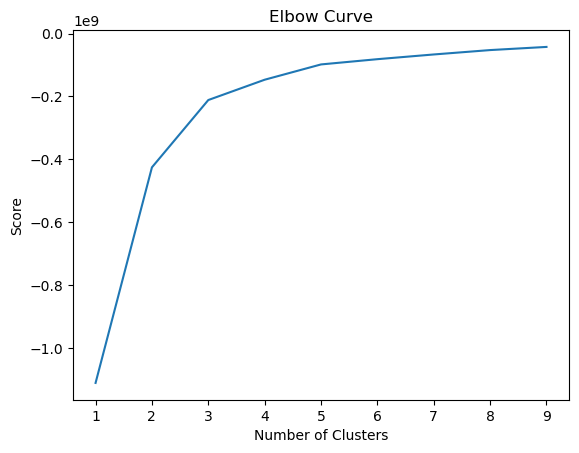

In [9]:
# Ploting the elbow curve using PyLab
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

###  4. Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart

Based on the chart above, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for the clusters is three.

### 5. Run the k-means algorithm

In [10]:
# Creating the k-means object
kmeans = KMeans(n_clusters = 3) 

In [11]:
# Running the k-means object to the data
kmeans.fit(numeric_df)

C:\Users\loren\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

### 6. Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters

In [12]:
# Attaching new variable on df
numeric_df['clusters'] = kmeans.fit_predict(numeric_df)

C:\Users\loren\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
# Checking df with new variable ('clusters')
numeric_df.head()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,Density,Forested Area,clusters
0,51.0,1.0,36.0,0.0,51.0,9.0,0.5,2
1,54.0,1.0,41.0,1.0,54.0,9.0,0.5,2
2,31.0,1.0,31.0,0.0,17.0,9.0,0.5,2
3,29.0,0.0,29.0,0.0,25.0,9.0,0.5,2
4,38.0,1.0,38.0,0.0,13.0,9.0,0.5,2


In [14]:
# Counting the clusters
numeric_df['clusters'].value_counts()

2    8930
0    4681
1       1
Name: clusters, dtype: int64

### 7. Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters

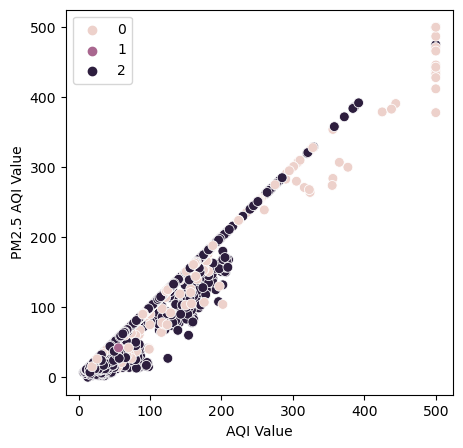

In [15]:
# Ploting the clusters
plt.figure(figsize=(5,5))
ax = sns.scatterplot(x=numeric_df['AQI Value'], y=numeric_df['PM2.5 AQI Value'], hue=kmeans.labels_, s=50)
ax.grid(False)
plt.xlabel('AQI Value')
plt.ylabel('PM2.5 AQI Value')
plt.show()

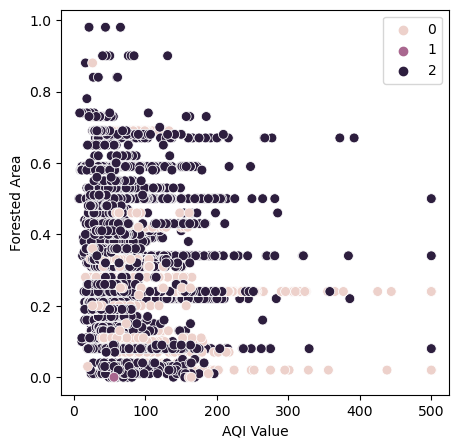

In [24]:
# Ploting the clusters
plt.figure(figsize=(5,5))
ax = sns.scatterplot(x=df['AQI Value'], y=df['Forested Area'], hue=kmeans.labels_, s=50)
ax.grid(False)
plt.xlabel('AQI Value') 
plt.ylabel('Forested Area') 
plt.show()

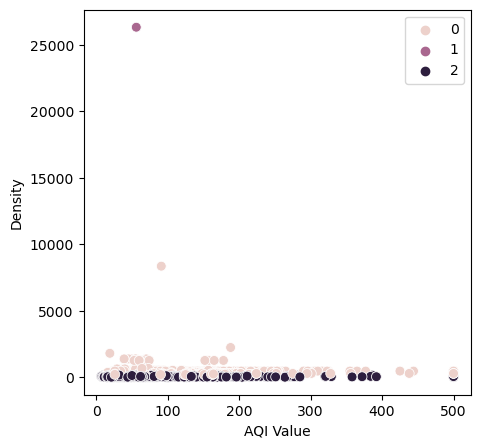

In [22]:
# Ploting the clusters
plt.figure(figsize=(5,5))
ax = sns.scatterplot(x=df['AQI Value'], y=df['Density'], hue=kmeans.labels_, s=50)
ax.grid(False) 
plt.xlabel('AQI Value') 
plt.ylabel('Density') 
plt.show()

### 8. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further

The clusters make no sense. Tthis might indicates the need for thorough data exploration, preprocessing, feature engineering, and potentially using different clustering methods.

### 9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings

In [18]:
# Naming the clusters
numeric_df.loc[numeric_df['clusters'] == 2, 'cluster'] = 'dark purple'
numeric_df.loc[numeric_df['clusters'] == 1, 'cluster'] = 'purple'
numeric_df.loc[numeric_df['clusters'] == 0, 'cluster'] = 'pink'

In [21]:
# Groupping the clusters
numeric_df.groupby('cluster').agg({'AQI Value':['mean', 'median'], 
                         'PM2.5 AQI Value':['mean', 'median'], 
                         'Forested Area':['mean', 'median'],
                         'Density':['mean', 'median']})

AQI Value        PM2.5 AQI Value        Forested Area         \
                  mean median            mean median          mean median   
cluster                                                                     
dark purple  59.661702   51.0       56.339418   51.0      0.370323   0.34   
pink         70.070498   54.0       66.622517   53.0      0.295653   0.32   
purple       56.000000   56.0       42.000000   42.0      0.000000   0.00   

                  Density           
                     mean   median  
cluster                             
dark purple     57.573124     36.0  
pink           321.035890    281.0  
purple       26337.000000  26337.0

### 10. Propose what these results could be useful for in future steps of an analytics pipeline

If the variables had correlation, the result could be used for:

**Cluster Labels**: Classify clusters by pollution, forest cover, and density.

**Segmentation**: Group similar regions for better understanding.

**Environmental Strategies**: Guide pollution control and green initiatives.

**Custom Policies**: Tailor policies for pollution and green management.

**Urban Planning**: Aid green space allocation and density management.

**Alerts**: Assist in monitoring and quick response to concerns.

**Enhanced Models**: Improve predictive models for air quality.

**Pattern Discovery**: Uncover AQI, PM2.5, forests, and density patterns.